In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download nltk data (only required the first time)
nltk.download('stopwords')
nltk.download('punkt')

# Load the dataset
url =  '/content/drive/MyDrive/Mini_Projects/Sentiment_Analysis/Tweets.csv' # Use a different URL for demonstration
data = pd.read_csv(url)

# Display the first few rows of the dataset
print(data.head())

# Preprocessing function
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# Apply preprocessing
data['text'] = data['text'].apply(preprocess_text)

# Feature extraction
X = data['text']
y = data['airline_sentiment']

# Convert labels to numerical values
y = y.map({'negative': 0, 'neutral': 1, 'positive': 2})

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnar

In [4]:
# Create a pipeline with a TfidfVectorizer and Naive Bayes classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)


# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive']))



Accuracy: 0.6943
Classification Report:
              precision    recall  f1-score   support

    negative       0.68      0.99      0.81      1889
     neutral       0.73      0.12      0.21       580
    positive       0.94      0.18      0.31       459

    accuracy                           0.69      2928
   macro avg       0.79      0.43      0.44      2928
weighted avg       0.74      0.69      0.61      2928



In [5]:
# Define some new data for predictions
new_data = [
    "I love the customer service!",
    "The flight was delayed, very frustrating.",
    "It was okay, not great but not bad either."
]

# Preprocess and predict
new_data_processed = [preprocess_text(text) for text in new_data]
predictions = pipeline.predict(new_data_processed)

# Map predictions back to sentiment labels
sentiments = ['negative', 'neutral', 'positive']
predicted_sentiments = [sentiments[pred] for pred in predictions]

# Print predictions
for text, sentiment in zip(new_data, predicted_sentiments):
    print(f"Text: {text}\nPredicted Sentiment: {sentiment}\n")


Text: I love the customer service!
Predicted Sentiment: negative

Text: The flight was delayed, very frustrating.
Predicted Sentiment: negative

Text: It was okay, not great but not bad either.
Predicted Sentiment: negative



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - accuracy: 0.6323 - loss: 0.8754 - val_accuracy: 0.7623 - val_loss: 0.6012
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.7981 - loss: 0.5004 - val_accuracy: 0.7937 - val_loss: 0.5421
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8823 - loss: 0.3380 - val_accuracy: 0.7780 - val_loss: 0.6302
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9064 - loss: 0.2550 - val_accuracy: 0.7835 - val_loss: 0.6412
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9294 - loss: 0.2011 - val_accuracy: 0.7725 - val_loss: 0.6940
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7933 - loss: 0.5409
Test Loss: 0.5421
Test Accuracy: 0.7937


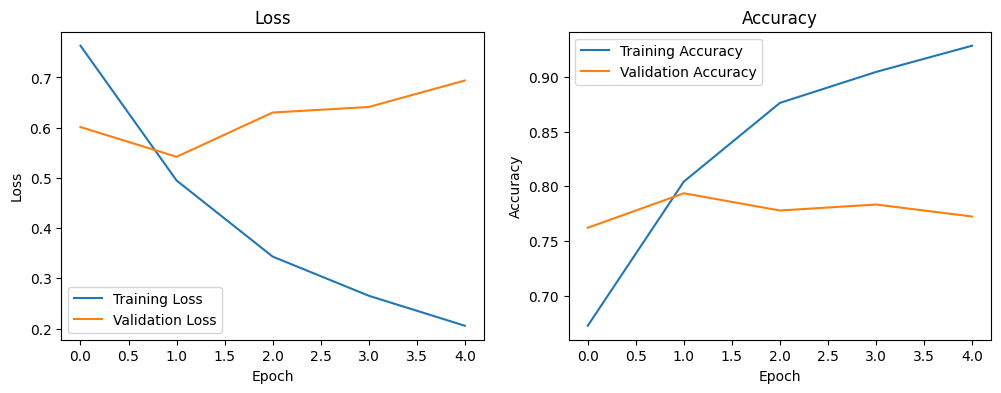

In [6]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
# Preprocessing function
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    return text

# Apply preprocessing
data['text'] = data['text'].apply(preprocess_text)

# Feature and label preparation
X = data['text']
y = data['airline_sentiment']

# Convert labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_encoded = to_categorical(y_encoded)

# Tokenization and padding
max_words = 10000  # Maximum number of words to keep
max_len = 100      # Maximum length of sequences

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(X_sequences, maxlen=max_len)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_encoded, test_size=0.3, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# Plot training and validation loss/accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()



In [7]:
# Generate classification report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print('Classification Report:')
print(classification_report(y_test_classes, y_pred_classes, target_names=label_encoder.classes_))

# Predictions on new data
new_data = [
    "I love the customer service!",
    "The flight was delayed, very frustrating.",
    "It was okay, not great but not bad either."
]

# Preprocess and pad new data
new_data_processed = [preprocess_text(text) for text in new_data]
new_data_sequences = tokenizer.texts_to_sequences(new_data_processed)
new_data_padded = pad_sequences(new_data_sequences, maxlen=max_len)

# Make predictions
predictions = model.predict(new_data_padded)
predicted_classes = np.argmax(predictions, axis=1)

# Map predictions back to sentiment labels
sentiments = label_encoder.classes_
predicted_sentiments = [sentiments[pred] for pred in predicted_classes]

# Print predictions
for text, sentiment in zip(new_data, predicted_sentiments):
    print(f"Text: {text}\nPredicted Sentiment: {sentiment}\n")

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Classification Report:
              precision    recall  f1-score   support

    negative       0.84      0.91      0.87      2814
     neutral       0.62      0.55      0.58       884
    positive       0.79      0.62      0.70       694

    accuracy                           0.79      4392
   macro avg       0.75      0.69      0.72      4392
weighted avg       0.79      0.79      0.79      4392

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Text: I love the customer service!
Predicted Sentiment: positive

Text: The flight was delayed, very frustrating.
Predicted Sentiment: negative

Text: It was okay, not great but not bad either.
Predicted Sentiment: positive



In [8]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D

# Build the CNN model
model_cnn = Sequential()
model_cnn.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model_cnn.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(3, activation='softmax'))

model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
history_cnn = model_cnn.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the CNN model
loss_cnn, accuracy_cnn = model_cnn.evaluate(X_test, y_test)
print(f'Test Loss (CNN): {loss_cnn:.4f}')
print(f'Test Accuracy (CNN): {accuracy_cnn:.4f}')

# Classification report
y_pred_cnn = model_cnn.predict(X_test)
y_pred_classes_cnn = np.argmax(y_pred_cnn, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print('Classification Report (CNN):')
print(classification_report(y_test_classes, y_pred_classes_cnn, target_names=label_encoder.classes_))


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


161/161 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.6379 - loss: 0.8170 - val_accuracy: 0.7666 - val_loss: 0.5876
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8123 - loss: 0.4628 - val_accuracy: 0.7880 - val_loss: 0.5478
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9124 - loss: 0.2529 - val_accuracy: 0.7794 - val_loss: 0.6378
138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7662 - loss: 0.5866
Test Loss (CNN): 0.5876
Test Accuracy (CNN): 0.7666
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report (CNN):
              precision    recall  f1-score   support

    negative       0.81      0.93      0.87      2814
     neutral       0.57      0.39      0.46       884
    positive       0.70      0.58      0.63       694

    accuracy                           0.77      4392
   macro avg       0.70      0.63      0.66      4392
weighted avg       0.75      0.77      0.75      4392



In [9]:
from tensorflow.keras.layers import GRU

# Build the GRU model
model_gru = Sequential()
model_gru.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model_gru.add(GRU(128, return_sequences=True))
model_gru.add(Dropout(0.5))
model_gru.add(GRU(64))
model_gru.add(Dropout(0.5))
model_gru.add(Dense(3, activation='softmax'))

model_gru.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the GRU model
history_gru = model_gru.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the GRU model
loss_gru, accuracy_gru = model_gru.evaluate(X_test, y_test)
print(f'Test Loss (GRU): {loss_gru:.4f}')
print(f'Test Accuracy (GRU): {accuracy_gru:.4f}')

# Classification report
y_pred_gru = model_gru.predict(X_test)
y_pred_classes_gru = np.argmax(y_pred_gru, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print('Classification Report (GRU):')
print(classification_report(y_test_classes, y_pred_classes_gru, target_names=label_encoder.classes_))


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


161/161 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.6433 - loss: 0.8324 - val_accuracy: 0.7878 - val_loss: 0.5521
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.8321 - loss: 0.4307 - val_accuracy: 0.7862 - val_loss: 0.5588
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8944 - loss: 0.3033 - val_accuracy: 0.7842 - val_loss: 0.6370
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7865 - loss: 0.5513
Test Loss (GRU): 0.5521
Test Accuracy (GRU): 0.7878
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Classification Report (GRU):
              precision    recall  f1-score   support

    negative       0.83      0.92      0.87      2814
     neutral       0.66      0.45      0.54       884
    positive       0.71      0.67      0.69       694

    accuracy                           0.79      4392
   macro avg       0.73      0.68      0.70      4392
weighted avg       0.78      0.79      0.78      4392



In [10]:
data = pd.read_csv(url)

# Apply preprocessing if needed
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    return text

data['text'] = data['text'].apply(preprocess_text)

# Split the data
X = data[['text']]
y = data['airline_sentiment']

# Convert labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Create a DataFrame for train and test split
data['label'] = y_encoded
train_df, test_df = train_test_split(data, test_size=0.3, random_state=42)

In [11]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
import torch
import numpy as np
from sklearn.metrics import classification_report

# Load the pre-trained BERT tokenizer and model for sequence classification
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)  # Assuming 3 sentiment classes

# Tokenize the data (train_df and test_df should already be prepared as shown before)
def tokenize_function(examples):
    return tokenizer(examples['text'].tolist(), padding='max_length', truncation=True, max_length=128)

train_encodings = tokenize_function(train_df)
test_encodings = tokenize_function(test_df)

# Convert to PyTorch datasets
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = CustomDataset(train_encodings, train_df['label'].tolist())
test_dataset = CustomDataset(test_encodings, test_df['label'].tolist())

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',              # output directory
    num_train_epochs=10,                  # number of training epochs
    per_device_train_batch_size=64,       # batch size for training
    per_device_eval_batch_size=64,        # batch size for evaluation
    warmup_steps=100,                    # number of warmup steps for learning rate scheduler
    weight_decay=0.01,                   # strength of weight decay
    logging_dir='./logs',                # directory for storing logs
    evaluation_strategy="epoch",         # Evaluate every epoch
    report_to="none"  # Disables W&B logging entirely
)

# Define a custom function to compute the metrics
def compute_metrics(p):
    predictions, labels = p
    preds = np.argmax(predictions, axis=1)
    report = classification_report(labels, preds, output_dict=True)
    return {
        'f1': report['weighted avg']['f1-score'],
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
    }

# Initialize the Trainer
trainer = Trainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=test_dataset,           # evaluation dataset
    compute_metrics=compute_metrics,     # the metrics function to compute during evaluation
)

# Train the model
trainer.train()

# Evaluate the model
eval_results = trainer.evaluate()
print("Evaluation results:", eval_results)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoin

Epoch,Training Loss,Validation Loss,F1,Precision,Recall
1,No log,0.502112,0.794511,0.816635,0.817395
2,No log,0.399857,0.848461,0.847309,0.851548
3,No log,0.456507,0.844300,0.842961,0.846767
4,0.403600,0.620256,0.833582,0.840235,0.829918
5,0.403600,0.704693,0.841575,0.841198,0.842213
6,0.403600,0.797255,0.834610,0.833787,0.836293
7,0.075300,0.834912,0.841167,0.840652,0.841758
8,0.075300,0.909393,0.833317,0.831659,0.836521
9,0.075300,0.947704,0.835706,0.834286,0.837887
10,0.021700,0.960570,0.837277,0.836728,0.837887


Evaluation results: {'eval_loss': 0.9605699777603149, 'eval_f1': 0.8372768532237875, 'eval_precision': 0.8367275291973034, 'eval_recall': 0.8378870673952641, 'eval_runtime': 31.1241, 'eval_samples_per_second': 141.112, 'eval_steps_per_second': 2.217, 'epoch': 10.0}


In [12]:
# Get predictions on the test dataset
predictions = trainer.predict(test_dataset)

# The raw logits (output from the model before applying softmax)
logits = predictions.predictions

# Convert logits to predicted class labels
predicted_labels = np.argmax(logits, axis=1)

# Actual labels
true_labels = test_df['label'].tolist()

# Print some predictions and the corresponding actual labels for comparison
for i in range(10):
    print(f"Text: {test_df['text'].iloc[i]}")
    print(f"Predicted Label: {predicted_labels[i]}, True Label: {true_labels[i]}")
    print("------")


Text: southwestair youre my early frontrunner for best airline oscars2016
Predicted Label: 2, True Label: 2
------
Text: usairways how is it that my flt to ewr was cancelled flightled yet flts to nyc from usairways are still flying
Predicted Label: 0, True Label: 0
------
Text: jetblue what is going on with your bdl to dca flights yesterday and today why is every single one getting delayed
Predicted Label: 0, True Label: 0
------
Text: jetblue do they have to depart from washington dc
Predicted Label: 1, True Label: 1
------
Text: jetblue i can probably find some of them are the ticket s on there
Predicted Label: 1, True Label: 0
------
Text: united still waiting to hear back my wallet was stolen from one of your planes so would appreciate a resolution here
Predicted Label: 0, True Label: 0
------
Text: united yes my flight was rebooked im just losing trust in you if i want to get anywhere on time
Predicted Label: 0, True Label: 0
------
Text: jetblue thank you  what about paris  could

In [13]:
# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision, recall, F1 score using classification_report
report = classification_report(true_labels, predicted_labels, target_names=label_encoder.classes_)
print("Classification Report:\n", report)

Accuracy: 0.8379
Classification Report:
               precision    recall  f1-score   support

    negative       0.90      0.91      0.90      2814
     neutral       0.68      0.66      0.67       884
    positive       0.78      0.78      0.78       694

    accuracy                           0.84      4392
   macro avg       0.79      0.78      0.78      4392
weighted avg       0.84      0.84      0.84      4392

